In [154]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u 
  

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(110)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages_grid = artpop.MISTIsochrone._log_age_grid[64:-1:4]
feh_grid = [-1.5, 0]

print(artpop.filters.get_filter_names('UBVRIplus'))
print(log_ages_grid)

['Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS']
[ 8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2]


In [155]:
I_AGB = [] 
B_AGB = []
V_AGB = []
H_AGB = []
J_AGB = []
K_AGB = []
I_RGB = []
B_RGB = []
V_RGB = []
H_RGB = []
J_RGB = []
K_RGB = []
I_PAGB = []
B_PAGB = []
V_PAGB = []
H_PAGB = []
J_PAGB = []
K_PAGB = []

for feh in feh_grid:
    for log_age in log_ages_grid:
        ssp = artpop.MISTSSP(
            log_age = log_age,        # log of age in years
            feh = -2,             # metallicity [Fe/H]
            phot_system = phot_system, # photometric system(s)
            num_stars = 5e7*log_age,      # number of stars
            random_state = rng,   # random state for reproducibility
            ab_or_vega = 'vega',   # Vega mag system
            imf = 'kroupa',
            mag_limit = -2.5,
            mag_limit_band = 'Bessell_V'
        )
        ssp_2 = artpop.MISTSSP(
            log_age = log_age,        # log of age in years
            feh = feh,             # metallicity [Fe/H]
            phot_system = phot_system, # photometric system(s)
            num_stars = 1e7,      # number of stars
            random_state = rng,   # random state for reproducibility
            ab_or_vega = 'vega',   # Vega mag system
            imf = 'kroupa',
        )
        RGB = ssp_2.select_phase('RGB')
        AGB = ssp_2.select_phase('AGB')
        PAGB = ssp.select_phase('postAGB')
        I_AGB.append(ssp_2.star_mags('Bessell_I')[AGB])
        B_AGB.append(ssp_2.star_mags('Bessell_B')[AGB])
        V_AGB.append(ssp_2.star_mags('Bessell_V')[AGB])
        H_AGB.append(ssp_2.star_mags('2MASS_H')[AGB])
        J_AGB.append(ssp_2.star_mags('2MASS_J')[AGB])
        K_AGB.append(ssp_2.star_mags('2MASS_Ks')[AGB])
        I_RGB.append(ssp_2.star_mags('Bessell_I')[RGB])
        B_RGB.append(ssp_2.star_mags('Bessell_B')[RGB])
        V_RGB.append(ssp_2.star_mags('Bessell_V')[RGB])
        H_RGB.append(ssp_2.star_mags('2MASS_H')[RGB])
        J_RGB.append(ssp_2.star_mags('2MASS_J')[RGB])
        K_RGB.append(ssp_2.star_mags('2MASS_Ks')[RGB])
        I_PAGB.append(ssp.star_mags('Bessell_I')[PAGB])
        B_PAGB.append(ssp.star_mags('Bessell_B')[PAGB])
        V_PAGB.append(ssp.star_mags('Bessell_V')[PAGB])
        H_PAGB.append(ssp.star_mags('2MASS_H')[PAGB])
        J_PAGB.append(ssp.star_mags('2MASS_J')[PAGB])
        K_PAGB.append(ssp.star_mags('2MASS_Ks')[PAGB])

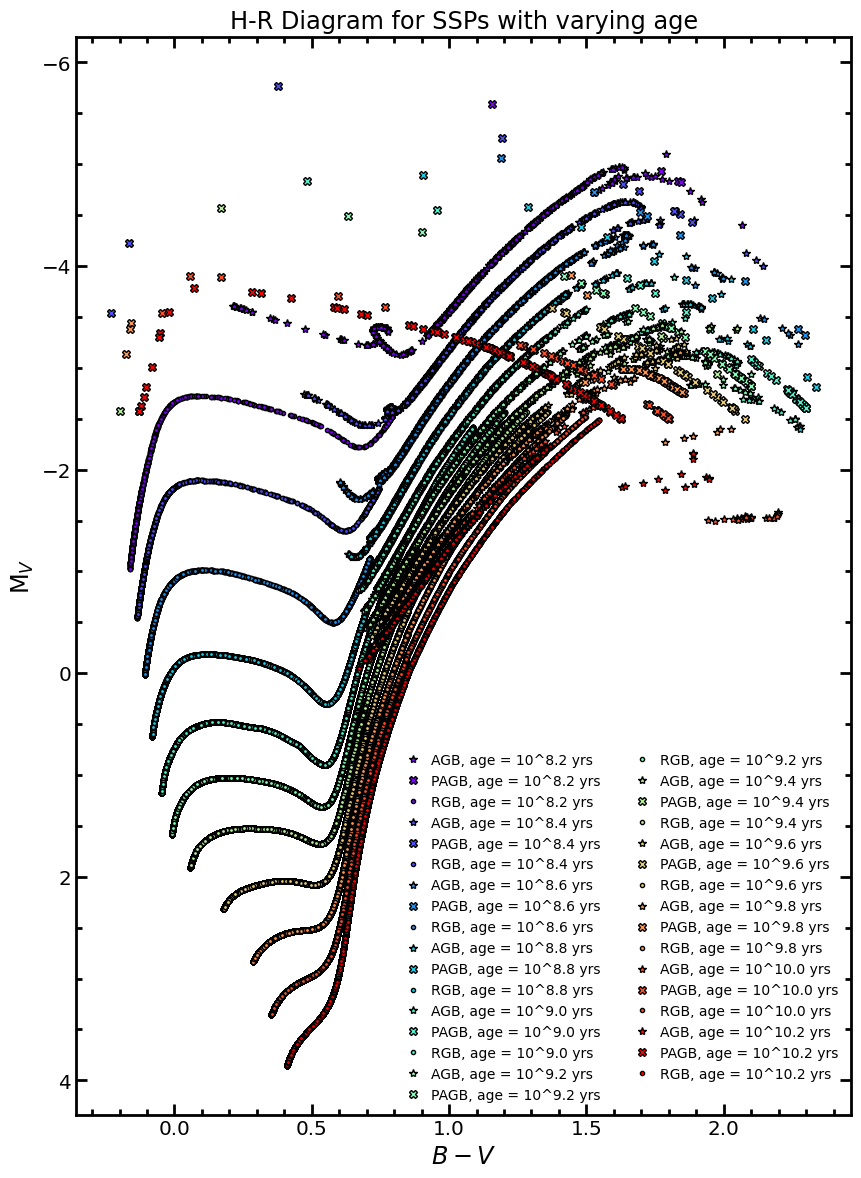

In [165]:
# plot B-V - V for H-R diagram
from matplotlib import cm

plt.figure(figsize=(10, 14), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(log_ages_grid)))

for i in range(len(log_ages_grid)):
    this_label = "PAGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs"
    plt.plot(B_AGB[i] - V_AGB[i], V_AGB[i], '*', c = colors[i], mec='k', label = "AGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs" ) 
    plt.plot(B_PAGB[i] - V_PAGB[i], V_PAGB[i], 'X', c = colors[i], mec='k', label = this_label)
    plt.plot(B_RGB[i] - V_RGB[i], V_RGB[i], '.', c = colors[i], mec='k', label = "RGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs" ) 
    # plt.plot(ssp.star_mags('Bessell_B') - ssp.star_mags('Bessell_V'), ssp.star_mags('Bessell_V'),  c = colors[i], mec='k')


# plt.xlim(0.5,2)
# plt.ylim(-9,-3)
plt.legend(loc=4, prop={'size': 10}, ncol=2)
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$B-V$')
plt.ylabel(r'M$_V$')
plt.title("H-R Diagram for SSPs with varying age");

Find TRGB I-band Magnitude:

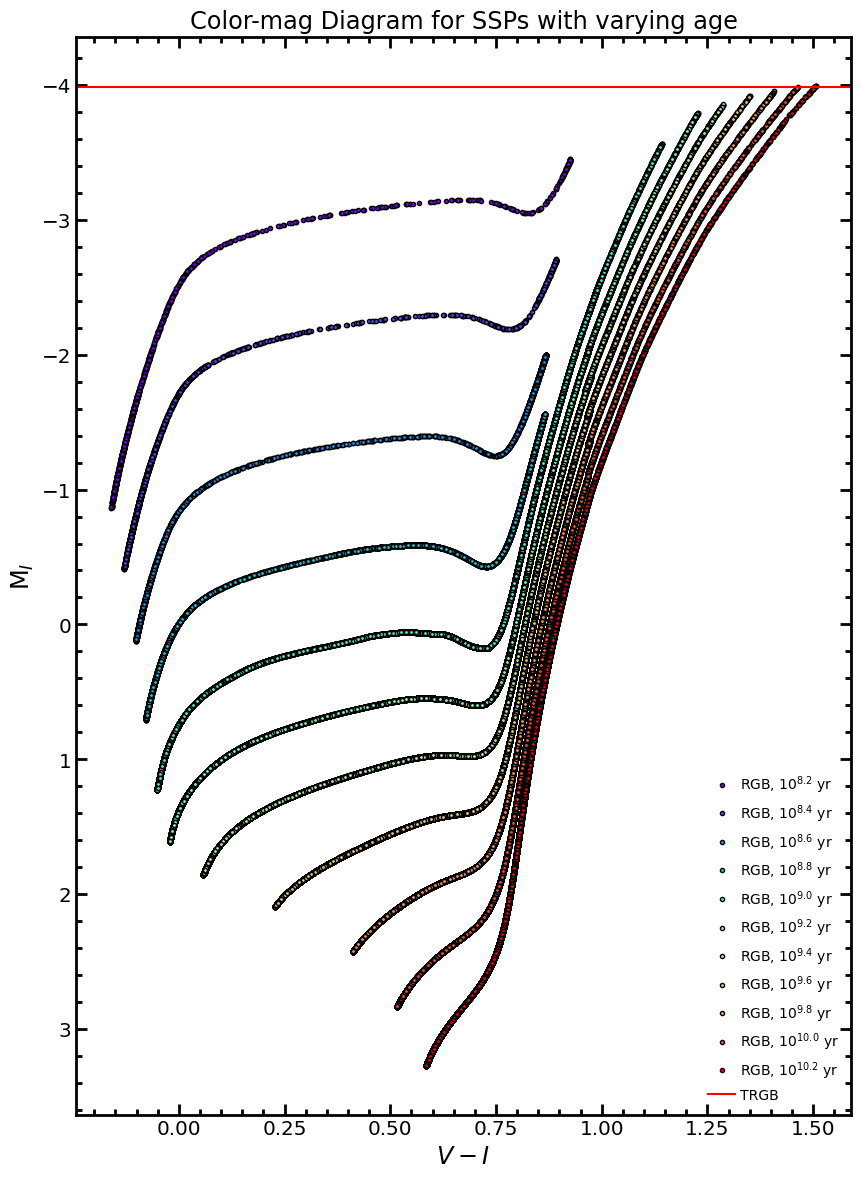

In [157]:
# plot V-I - I for TRGB

plt.figure(figsize=(10, 14), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(log_ages_grid)))


for i in range(len(log_ages_grid)):
    RGB_label = r"RGB, $10^{"+ "{:.1f}".format(log_ages_grid[i]) + r"}$ yr"
    # plt.plot(V_AGB[i] - I_AGB[i], I_AGB[i], '*', c = colors[i], mec='k', label = "AGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs" ) 
    plt.plot(V_RGB[i] - I_RGB[i], I_RGB[i], '.', c = colors[i], mec='k', label =  RGB_label) 

plt.axhline(y=-3.980974027109949, color='r', linestyle='-', label = 'TRGB')
# plt.xlim(0.5,2)
# plt.ylim(-9,-3)
plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$')
plt.title("Color-mag Diagram for SSPs with varying age");

In [158]:
# Find TRGB mag and color

TRGB_mag = 1e6
TRGB_color = 1.4
for i in range(len(log_ages_grid)):
    I = I_RGB[i]
    if TRGB_mag > np.amin(I):
        TRGB_mag = np.amin(I)
    print('TRGB magnitude on I band =', np.amin(I))
    
print('TRGB magnitude on I band =', TRGB_mag)

TRGB magnitude on I band = -3.4476555158633553
TRGB magnitude on I band = -2.7073016279328783
TRGB magnitude on I band = -2.000920027392087
TRGB magnitude on I band = -1.5586133510390858
TRGB magnitude on I band = -3.5651174327154855
TRGB magnitude on I band = -3.7888443295454683
TRGB magnitude on I band = -3.855387646372751
TRGB magnitude on I band = -3.9179091077994186
TRGB magnitude on I band = -3.9529078247141434
TRGB magnitude on I band = -3.9814301787425284
TRGB magnitude on I band = -3.994956461484455
TRGB magnitude on I band = -3.994956461484455


<Axes: ylabel='Count'>

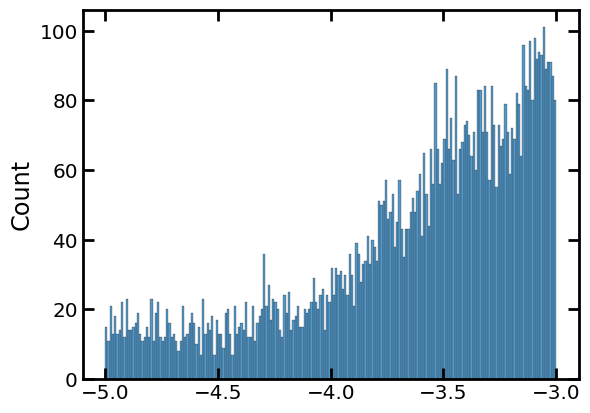

In [159]:
# Find TRGB mean mag
import seaborn as sns
import scipy 

mags = []
for i in range(len(log_ages_grid)):
    I_1 = I_RGB[i]
    I_2 = I_AGB[i]
    # print(V[all_cut])
    # print(all_cut)
    mags = np.concatenate((mags, I_1,I_2))
sns.histplot(data = mags, bins = 200, binrange=(-5,-3))


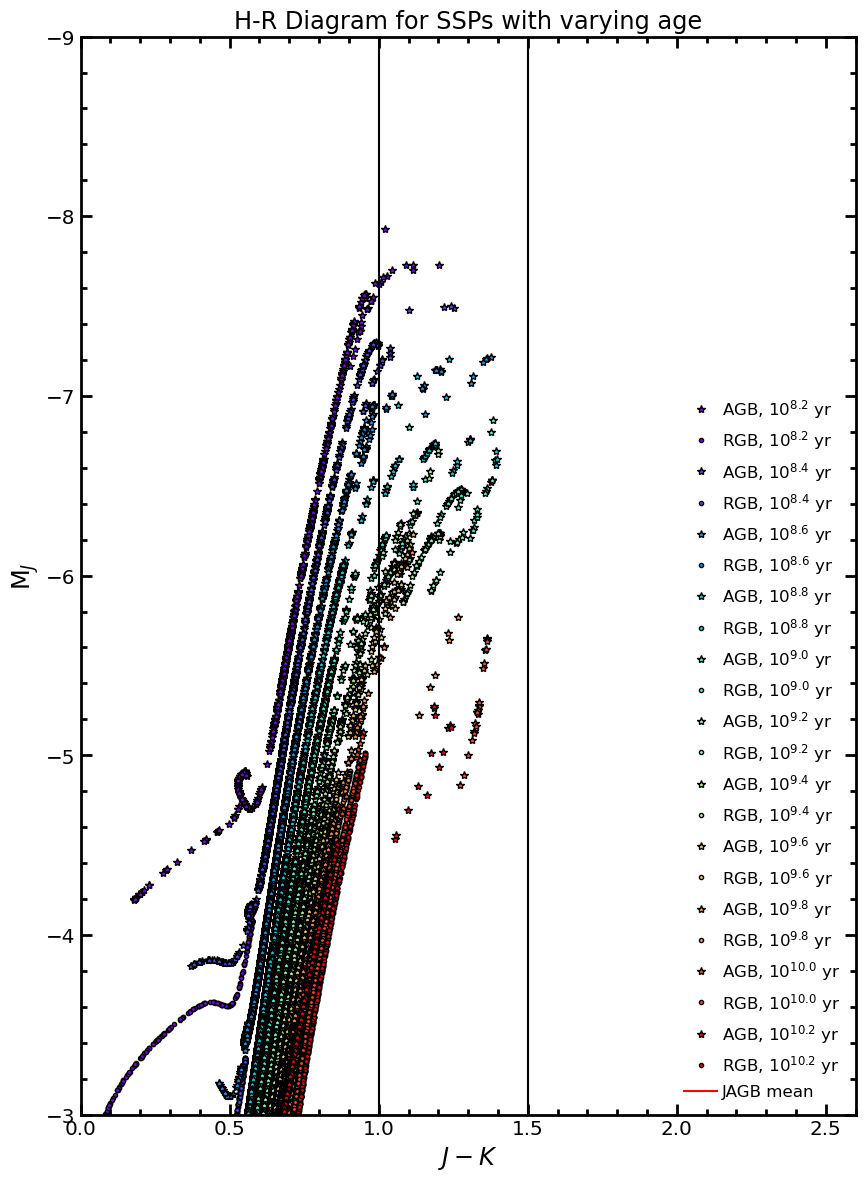

In [160]:
plt.figure(figsize=(10, 14), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(log_ages_grid)))

for i in range(len(log_ages_grid)):
    RGB_label = r"RGB, $10^{"+ "{:.1f}".format(log_ages_grid[i]) + r"}$ yr"
    AGB_label = r"AGB, $10^{"+ "{:.1f}".format(log_ages_grid[i]) + r"}$ yr"
    plt.plot(J_AGB[i] - K_AGB[i], J_AGB[i], '*', c = colors[i], mec='k', label = AGB_label ) 
    plt.plot(J_RGB[i] - K_RGB[i], J_RGB[i], '.', c = colors[i], mec='k', label = RGB_label ) 

plt.xlim(0,2.6)
plt.ylim(-9,-3)
plt.axhline(y=6.16, color='r', linestyle='-', label = 'JAGB mean')
# plt.axhline(y=-6.9, color='black', linestyle='-')
# plt.axhline(y=-5.6, color='black', linestyle='-')
plt.axvline(x=1, color='black', linestyle='-')
plt.axvline(x=1.5, color='black', linestyle='-')
plt.legend(loc=4, prop={'size': 12})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$J-K$')
plt.ylabel(r'M$_J$')
plt.title("H-R Diagram for SSPs with varying age");

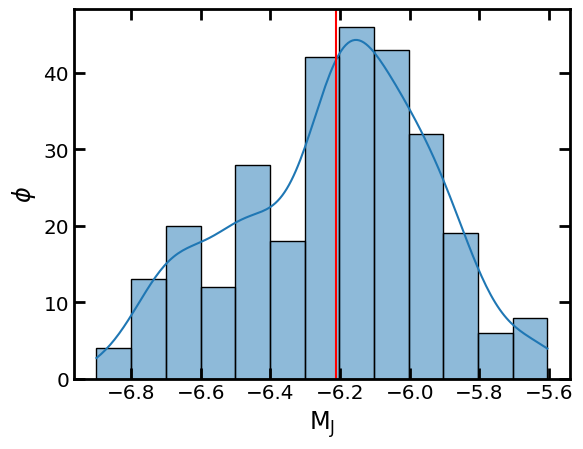

Average mag of JRGB on J band = -6.215404003440453
KDE max mag of JRGB on J band = -6.156851727588484


In [161]:
# Find JRGB mean mag
import seaborn as sns
import scipy 

mags = []
for i in range(len(log_ages_grid)):
    J_K = np.subtract(J_AGB[i], K_AGB[i])
    J = J_AGB[i]
    color_cut = np.all([J_K>1, J_K<1.5], axis=0)
    mag_cut = np.all([J>-6.9,J<-5.6], axis=0) 
    all_cut = np.all([color_cut,mag_cut], axis=0)
    # print(V[all_cut])
    # print(all_cut)
    mags = np.concatenate((mags, J[all_cut]))
ax = sns.histplot(data = mags, bins = 13, kde= True)
ax.set(xlabel=r'M$_\text{J}$', ylabel=r'$\phi$')
plt.axvline(x=-6.210790361414904, color='r', linestyle='-')
plt.show()

hist, bin_edges = np.histogram(mags, bins=100, density = False)
eval_points = np.linspace(np.min(bin_edges), np.max(bin_edges), num = 130)
kde_max = eval_points[np.argmax(scipy.stats.gaussian_kde(mags).pdf(eval_points))]
print('Average mag of JRGB on J band =', np.average(mags))
print('KDE max mag of JRGB on J band =', kde_max)

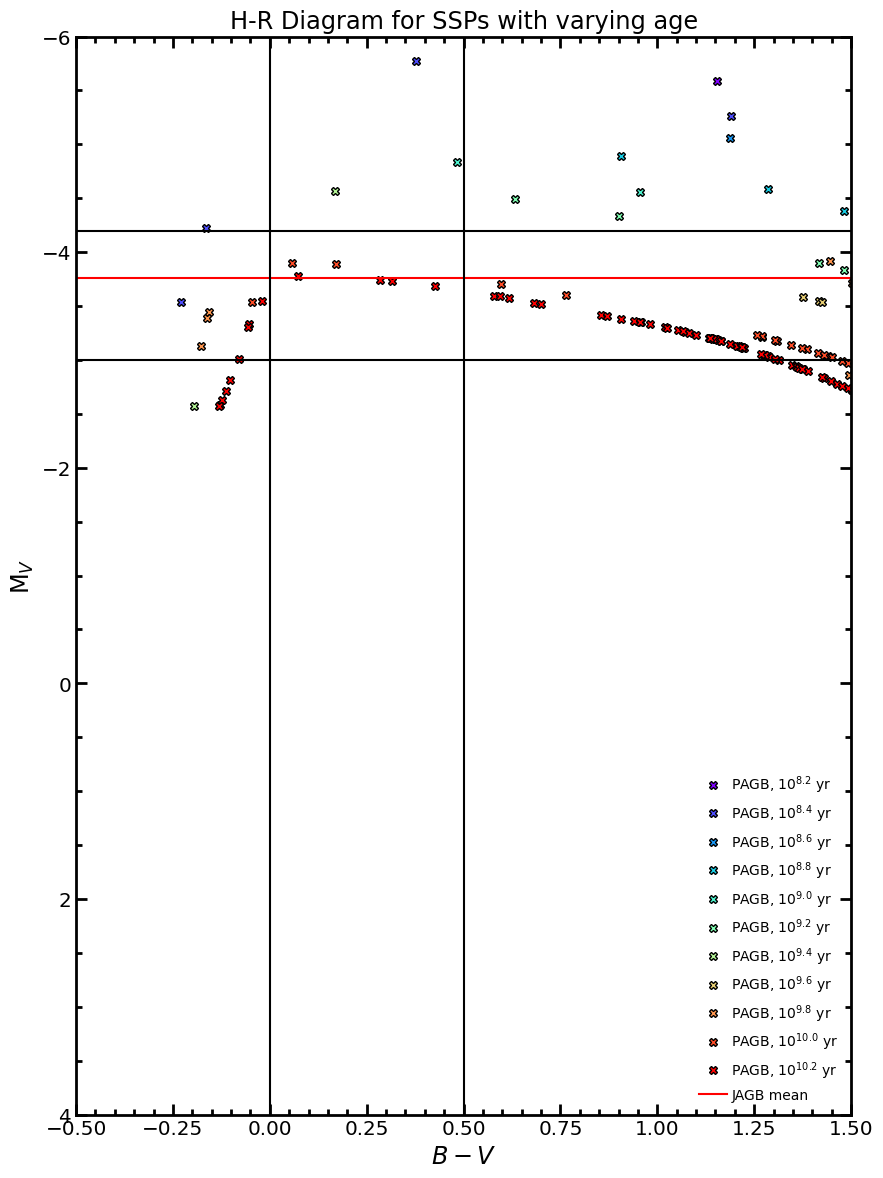

In [162]:
# plot J-K - J for PAGB
from matplotlib import cm

plt.figure(figsize=(10, 14), dpi=100)
colors = cm.rainbow(np.linspace(0, 1, len(log_ages_grid)))

for i in range(len(log_ages_grid)):
    PAGB_label = r"PAGB, $10^{"+ "{:.1f}".format(log_ages_grid[i]) + r"}$ yr"
    # plt.plot(B_AGB[i] - V_AGB[i], V_AGB[i], '*', c = colors[i], mec='k', label = "AGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs" ) 
    plt.plot(B_PAGB[i] - V_PAGB[i], V_PAGB[i], 'X', c = colors[i], mec='k', label = PAGB_label)
    # plt.plot(B_RGB[i] - V_RGB[i], V_RGB[i], '.', c = colors[i], mec='k', label = "RGB, age = 10^"+ str("{:.1f}".format(log_ages_grid[i])) + " yrs" ) 
    # plt.plot(ssp.star_mags('Bessell_B') - ssp.star_mags('Bessell_V'), ssp.star_mags('Bessell_V'),  c = colors[i], mec='k')


plt.axhline(y=-3.76, color='r', linestyle='-', label = 'JAGB mean')
plt.axhline(y=-4.2, color='black', linestyle='-')
plt.axhline(y=-3, color='black', linestyle='-')
plt.axvline(x=0.0, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')

plt.xlim(-0.5,1.5)
plt.ylim(-6,4)
plt.legend(loc=4, prop={'size': 10})
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$B-V$')
plt.ylabel(r'M$_V$')
plt.title("H-R Diagram for SSPs with varying age");


In [163]:
mags = []
for i in range(len(log_ages_grid)):
    B_V = np.subtract(B_PAGB[i], V_PAGB[i])
    V = V_PAGB[i]
    color_cut = np.all([B_V>0.0, B_V<0.5], axis=0)
    mag_cut = np.all([V>-4.1,V<-3.5], axis=0) 
    all_cut = np.all([color_cut,mag_cut], axis=0)
    # print(V[all_cut])
    # print(all_cut)
    mags = np.concatenate((mags, V[all_cut]))
    
print('Averaged mag of yPAGB on V band =', np.average(mags))


Averaged mag of yPAGB on V band = -3.78883383633081
